# Préambule
Dans ce notebook, nous regroupons tous les exercices du Travail à Rendre No 1.
Toutes les images sont stockées dans Google Drive, téléchargées et décompressées
comme dans les notebooks du cours.
Toutes les cellules de code sont exécutées avant soumission.

# 1. Niveaux de gris
Objectifs :
- Convertir une image de caméra de surveillance en niveaux de gris
- Comparer l'image originale avec l'image en niveaux de gris
- Trouver le pixel le plus lumineux pour identifier la source de lumière
- Discussion : le gris est-il meilleur pour la détection de mouvement ?

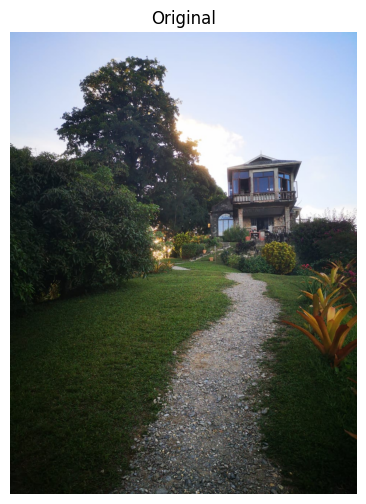

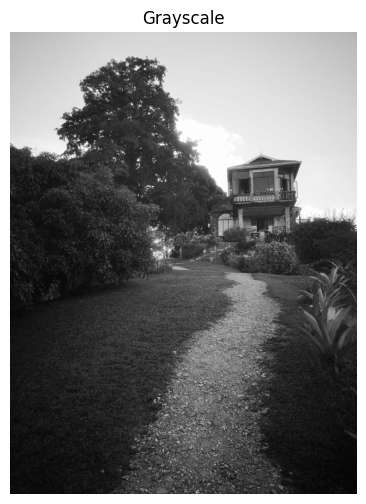

Pixel le plus lumineux: (416, 236) avec valeur: 255.0


In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour afficher une image avec Matplotlib
def show_img(img, title='Image', cmap=None):
    plt.figure(figsize=(8,6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

img = cv2.imread('images/houseonhill.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'Original')
show_img(gray, 'Grayscale', cmap='gray')

# Pixel le plus lumineux
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
print("Pixel le plus lumineux:", maxLoc, "avec valeur:", maxVal)

# 2. Espaces de couleurs
Objectifs :
- Convertir une image de feu tricolore en HSV
- Créer trois masques pour rouge, orange et vert
- Détecter automatiquement quelle lumière est allumée

In [ ]:
import cv2
img = cv2.imread('images/houseonhill.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Masques
red_mask = cv2.inRange(hsv, (0,100,100), (10,255,255))
orange_mask = cv2.inRange(hsv, (15,100,100), (25,255,255))
green_mask = cv2.inRange(hsv, (50,100,100), (70,255,255))

# Détection de la lumière allumée
for color, mask in zip(['Rouge','Orange','Vert'], [red_mask, orange_mask, green_mask]):
    if cv2.countNonZero(mask) > 500:
        print(f"Lumière allumée: {color}")

Lumière allumée: Orange


# 3. Dessin sur des images
Objectifs :
- Dessiner un rectangle autour du ballon
- Ajouter une flèche indiquant la direction du tir
- Ajouter un texte indiquant la vitesse du tir

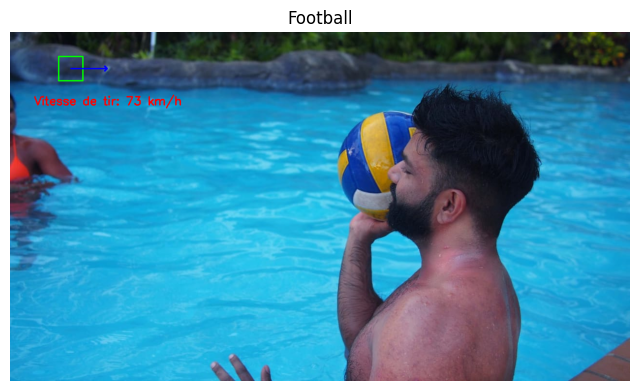

In [ ]:
img = cv2.imread('images/Volleyball.jpeg')

# Rectangle
cv2.rectangle(img, (100,50), (150,100), (0,255,0), 2)
# Flèche
cv2.arrowedLine(img, (125,75), (200,75), (255,0,0), 2)
# Texte
cv2.putText(img, 'Vitesse de tir: 73 km/h', (50,150), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

show_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'Football')


# 4. Transformations (Translation + Rotation)
Objectifs :
- Estimer l’angle d’inclinaison d’une photo prise de travers
- Appliquer une rotation inverse pour redresser la scène
- Comparer l’image avant et après correction

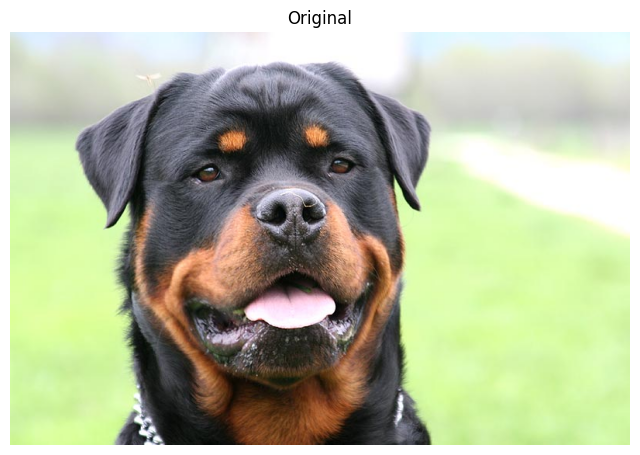

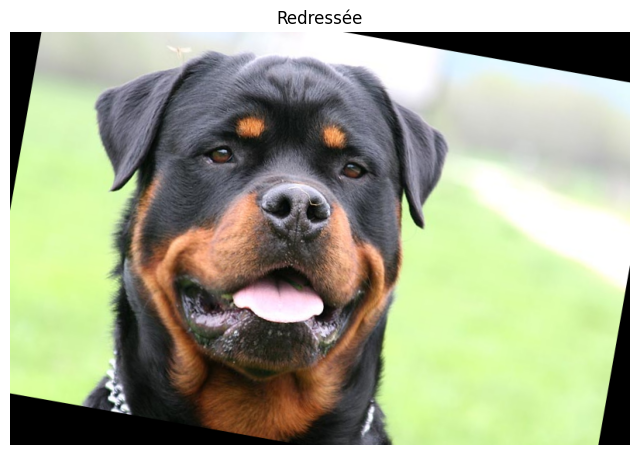

In [ ]:
img = cv2.imread('images/rot.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Angle estimé (exemple)
angle = -10
(h, w) = img.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
rotated = cv2.warpAffine(img, M, (w,h))

show_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'Original')
show_img(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB), 'Redressée')

# 5. Redimensionnement, interpolation et recadrage
Objectifs :
- Préparer une image pour un site e-commerce (512x512)
- Recadrer l’objet pour centrer dans un carré parfait
- Créer une miniature 128x128 et tester différentes interpolations

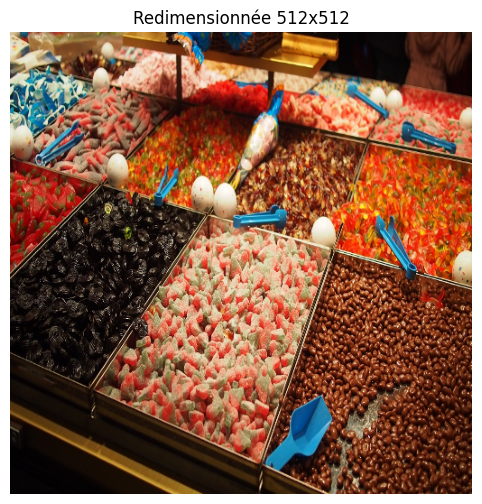

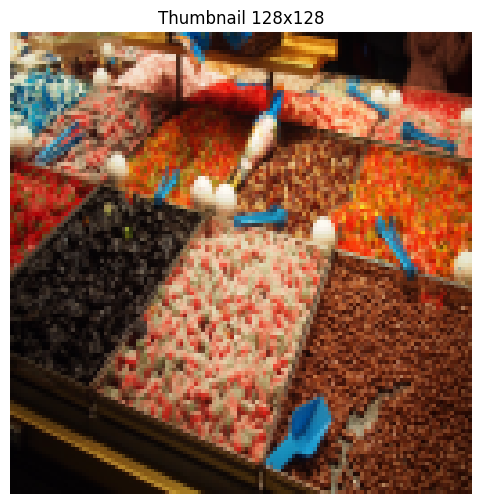

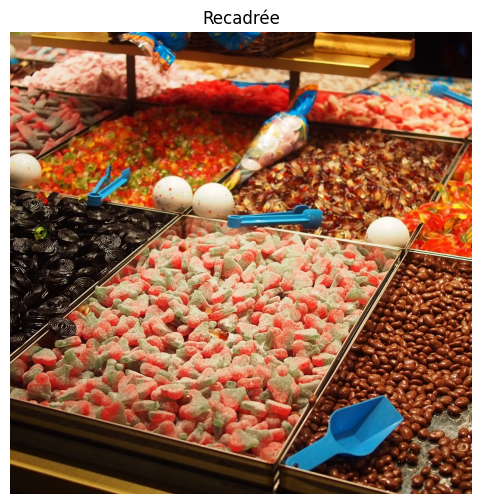

In [ ]:
img = cv2.imread('images/candy.jpg')
resized = cv2.resize(img, (512,512))
thumbnail = cv2.resize(img, (128,128), interpolation=cv2.INTER_AREA)

h, w = img.shape[:2]
min_dim = min(h,w)
crop_img = img[(h-min_dim)//2:(h+min_dim)//2, (w-min_dim)//2:(w+min_dim)//2]

show_img(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB), 'Redimensionnée 512x512')
show_img(cv2.cvtColor(thumbnail, cv2.COLOR_BGR2RGB), 'Thumbnail 128x128')
show_img(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB), 'Recadrée')


# 6. Histogrammes et Seuillage
Objectifs :
- Analyser l’histogramme d’une image satellite à faible contraste
- Appliquer une égalisation d’histogramme
- Effectuer un seuillage automatique (méthode d’Otsu) pour séparer nuages et eau

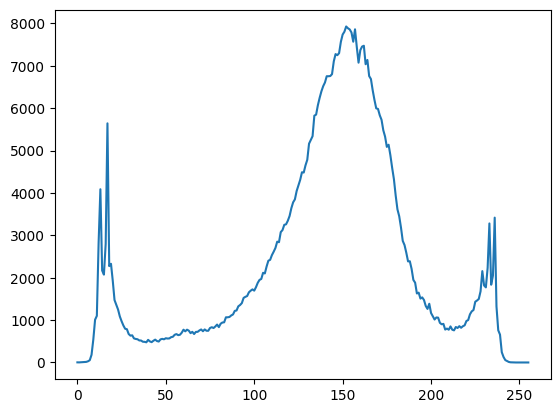

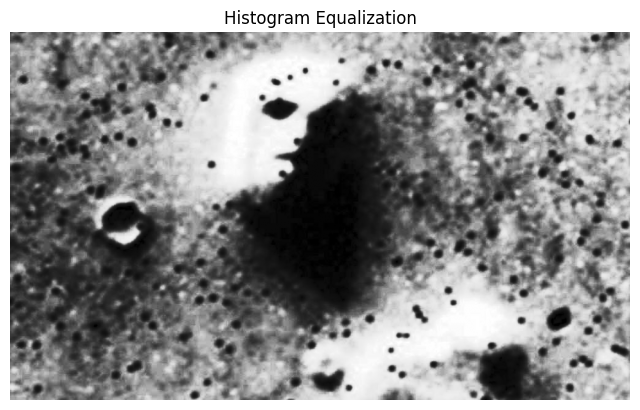

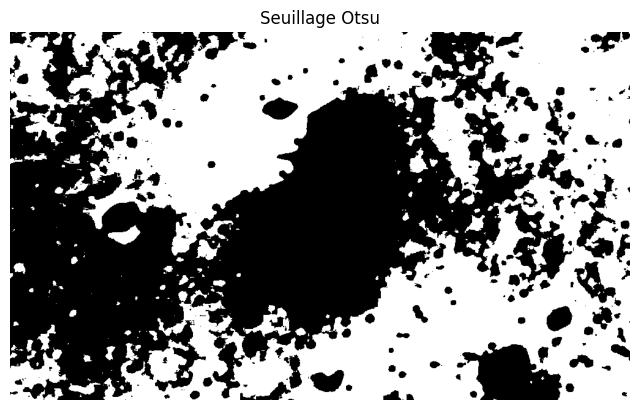

In [ ]:
img = cv2.imread('images/marsface.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

equalized = cv2.equalizeHist(img)
_, otsu = cv2.threshold(equalized,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

show_img(equalized, 'Histogram Equalization', cmap='gray')
show_img(otsu, 'Seuillage Otsu', cmap='gray')


# 7. Rehaussement d’images
Objectifs :
- Appliquer une correction gamma pour éclaircir une photo de nuit
- Visualiser l’histogramme après correction
- Augmenter légèrement le contraste et comparer avec l’original

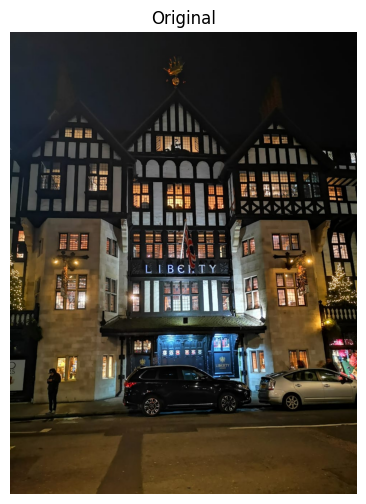

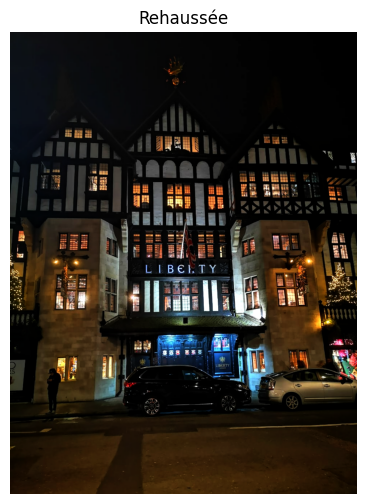

In [ ]:
img = cv2.imread('images/liberty.jpeg')
gamma = 1.6
gamma_corrected = np.array(255*(img/255)**gamma, dtype='uint8')
enhanced = cv2.convertScaleAbs(gamma_corrected, alpha=1.2, beta=0)

show_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'Original')
show_img(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB), 'Rehaussée')


# 8. Convolutions, Blurring & Sharpening
Objectifs :
- Réduire le bruit avec un flou gaussien
- Restaurer les détails avec un filtre de netteté
- Ajouter artificiellement du bruit et observer les effets

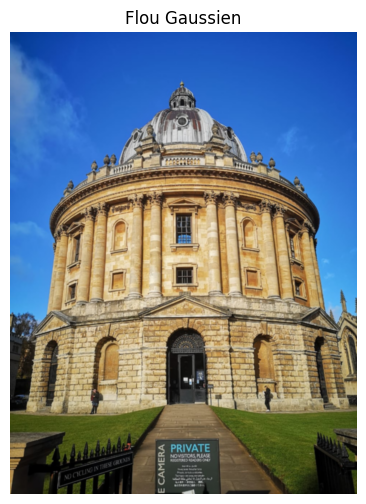

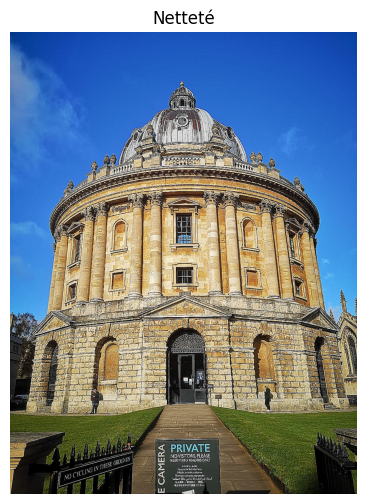

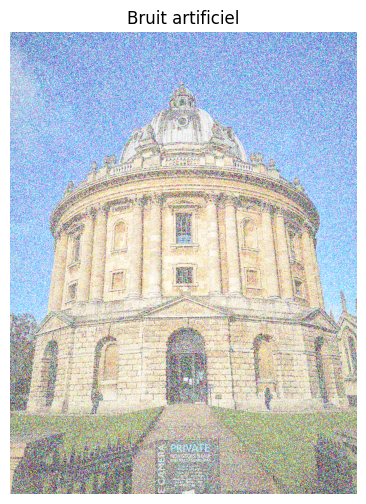

In [ ]:
img = cv2.imread('images/oxfordlibrary.jpeg')
blurred = cv2.GaussianBlur(img, (5,5), 0)
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv2.filter2D(img, -1, kernel)

noise = np.random.normal(0,25,img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

show_img(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB), 'Flou Gaussien')
show_img(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB), 'Netteté')
show_img(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB), 'Bruit artificiel')
